# Assignment-03:

In [2]:
# importing dependencies-
import numpy as np
import matplotlib.pyplot as plt
import math

def uniform_generator(x_0):
    a = 1597
    b = 21544
    m = 244944
    x_0 = (a*x_0 + b)%m
    return x_0/m, x_0

## Problem-01:
To find the sample of pdf: f(x) = 20*x(1-x)^3 using Acceptance Rejectance Model.

Obtained average value is 0.47167586434602143 and Calculated average probability value is 0.47393364928909953
Observed average number of iterations upto an accept is 2.1201 and calculated is 2.11
Obtained Expectation value of distribution is 0.3345570350774054 and Calculated Expectation is 0.3333333333


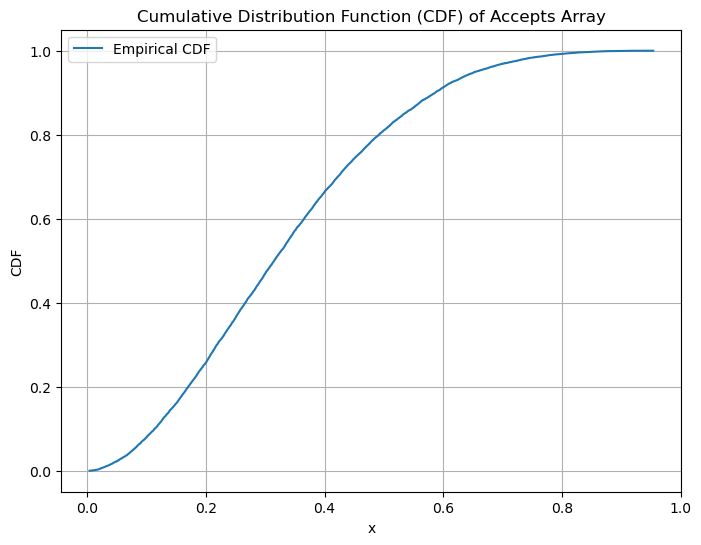

Observed Probability of P(0.25 <= X <= 0.75) = 0.6194, while actual is 0.61719


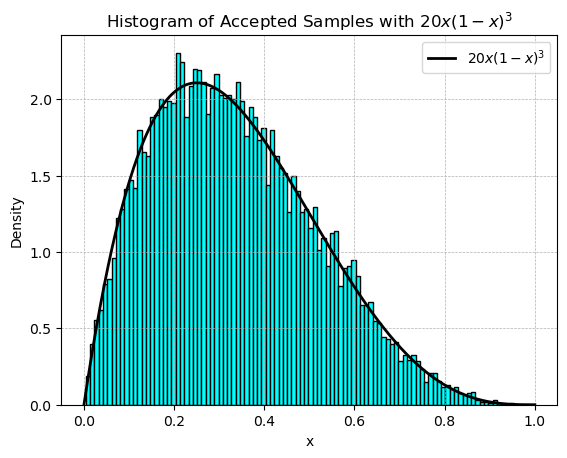

In [19]:
# Taking the value for N = 10000
N = 10000
accepts = []
u_0 = 42 # Setting seed for U(0, 1) generation.
x_0 = 13 # Setting seed for g(x) generation.
count = 0 # Counting the number of times we are sampling.
c = 2.11
for _ in range(N):
    while(True):
        count += 1
        u, u_0 = uniform_generator(u_0)
        x, x_0 = uniform_generator(x_0)
        if(u < ((20*x*(1 - x)**3)/(c))):
            accepts.append(x)
            break
print(f'Obtained average value is {N/count} and Calculated average probability value is {1/c}')
print(f"Observed average number of iterations upto an accept is {count/N} and calculated is {c}")
mean = np.mean(accepts)
var = np.var(accepts)
print(f"Obtained Expectation value of distribution is {mean} and Calculated Expectation is {0.3333333333}")


# Plotting the value of CDF obtained: 
accepts= np.sort(accepts)
X = np.arange(1, len(accepts) + 1) / len(accepts)
plt.figure(figsize = (8, 6))
plt.plot(accepts, X, label='Empirical CDF')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Accepts Array')
plt.legend()
plt.grid(True)
plt.show()

# Printing probability between 0.25 and 0.75. 
cdf_025 = X[np.searchsorted(accepts, 0.25, side='right') - 1]
cdf_075 = X[np.searchsorted(accepts, 0.75, side='right') - 1]
# Calculate the probability P(0.25 <= X <= 0.75)
probability = cdf_075 - cdf_025
print(f"Observed Probability of P(0.25 <= X <= 0.75) = {probability}, while actual is {0.61719}")

# Creating the actual distribution of the function
y = [20 * (i/1000) * (1 - (i/1000))**3 for i in range(1000)]
x = np.linspace(0, 1, 1000)  

# Plot the histogram of the accepts array.
# plt.figure(figsize=(8, 6))
plt.hist(accepts, bins=100, color='cyan', edgecolor='black', density = True)
plt.plot(x, y, color='black', lw=2, label='$20x(1-x)^3$')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Accepted Samples with $20x(1-x)^3$')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [27]:
# Repeating above tasks for values of c higher than chosen:
for c in [4, 10]:
    print("--------------------------------------------------------------------------------------------------------------------------")
    accepts = []
    u_0 = 42 # Setting seed for U(0, 1) generation.
    x_0 = 13 # Setting seed for g(x) generation.
    count = 0 # Counting the number of times we are sampling.
    for _ in range(N):
        while(True):
            count += 1
            u, u_0 = uniform_generator(u_0)
            x, x_0 = uniform_generator(x_0)
            if(u < ((20*x*(1 - x)**3)/(c))):
                accepts.append(x)
                break
    # print(f'Obtained average value is {N/count} and Calculated average probability value is {1/c}')
    # print(f"Observed average number of iterations upto an accept is {count/N} and calculated is {c}")
    mean = np.mean(accepts)
    var = np.var(accepts)
    # print(f"Obtained Expectation value of distribution is {mean} and Calculated Expectation is {0.3333333333}")
    
    
    # Plotting the value of CDF obtained: 
    accepts= np.sort(accepts)
    X = np.arange(1, len(accepts) + 1) / len(accepts)
    # plt.figure(figsize = (8, 6))
    # plt.plot(accepts, X, label='Empirical CDF')
    # plt.xlabel('x')
    # plt.ylabel('CDF')
    # plt.title('Cumulative Distribution Function (CDF) of Accepts Array')
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    print(accepts)
    # Printing probability between 0.25 and 0.75. 
    cdf_025 = X[np.searchsorted(accepts, 0.25) - 1]
    cdf_075 = X[np.searchsorted(accepts, 0.75) - 1]
    # Calculate the probability P(0.25 <= X <= 0.75)
    probability = cdf_075 - cdf_025
    print(f"Observed Probability of P(0.25 <= X <= 0.75) = {probability}, while actual is {0.61719}")

--------------------------------------------------------------------------------------------------------------------------
[0.00158812 0.00312316 0.00356408 ... 0.91291479 0.92037772 0.93332762]
Observed Probability of P(0.25 <= X <= 0.75) = 0.6109, while actual is 0.61719
--------------------------------------------------------------------------------------------------------------------------
[0.00356408 0.00356408 0.00554004 ... 0.90742782 0.90742782 0.94079055]
Observed Probability of P(0.25 <= X <= 0.75) = 0.6116, while actual is 0.61719


## Problem-02:
Generating acceptance rejection sampling from f(x) ⍺ x^(a-1)e^-x for {0 <= x <= 1}

In [7]:
def gen_alpha_frac(u, alpha):
    A = 1/math.e + 1/alpha
    if(u < 1/(alpha*A)):
        return (alpha*u*A)**(1/alpha)
    else:
        return -1*math.log(A) - math.log(1 - u)


def gen_alpha_int(alpha, seed):
    n = alpha
    u_0 = seed
    y = 0
    while(n != 0):
        u, u_0 = uniform_generator(u_0)
        if(u == 0):
            continue
        x = -1*math.log(u)
        y += x
        n -= 1
    return y, u_0

In [8]:
N = 10000
for alpha in [0.7, 3, 3.7]:
    accepts = []
    if alpha > 0 and alpha < 1:
        u_0 = 42
        for _ in range(N):
            u, u_0 = uniform_generator(u_0)
            accepts.append(gen_alpha_frac(u,alpha))
        mean = np.mean(accepts)
        var = np.var(accepts)
        print(f"The observed mean is {mean} and variance is {var}")
    elif alpha > 1 and alpha % 1 == 0:
        u_0 = 42
        for _ in range(N):
            x, u_0 = gen_alpha_int(alpha, u_0)
            accepts.append(x)
        mean = np.mean(accepts)
        var = np.var(accepts)
        print(f"The observed mean is {mean} and variance is {var}")
    elif alpha > 1:
        u_0 = 42
        y_0 = 13
        for _ in range(N):
            u, u_0 = uniform_generator(u_0)
            x1 = gen_alpha_frac(u, alpha%1)
            x2, y_0 = gen_alpha_int(alpha//1, y_0)
            accepts.append(x1 + x2)
        mean = np.mean(accepts)
        var = np.var(accepts)
        print(f"The observed mean is {mean} and variance is {var}")   

# for alpha = 0.7 gamma(alpha)=1.29942
alpha = 0.7
gammaalpha = 1.29942
A = (1/alpha) + (1/np.exp(1))
c = A/gammaalpha
print(f"The rejection constant for alpha = 0.7 is {c}")

# for alpha = 3 gamma(alpha)=1.994277
alpha = 3
gammaalpha = 1.994277
A = (1/alpha) + (1/np.exp(1))
c = A/gammaalpha
print(f"The rejection constant for alpha = 3 is {c}")

# for alpha = 3.7 gamma(alpha)=4.17504
alpha = 3.7
gammaalpha = 4.17504
A = (1/alpha) + (1/np.exp(1))
c = A/gammaalpha
print(f"The rejection constant for alpha = 3.7 is {c}")

The observed mean is 0.7404536653958105 and variance is 0.7123438652889056
The observed mean is 3.0027622457397767 and variance is 2.993123340808345
The observed mean is 3.7287724514279836 and variance is 3.724486938804557
The rejection constant for alpha = 0.7 is 1.3825020930437202
The rejection constant for alpha = 3 is 0.35161252649695884
The rejection constant for alpha = 3.7 is 0.15284876586612642


# end